# III. 영화 리뷰 데이터 딥러닝 트레이닝과 추론

---
### 1) 데이터 로드 : dataframe

In [1]:
import os
import pickle

In [2]:
DATA_DIR = 'data'
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, 'processed')

PROCESSED_DATA_FILE = "train_padded.p"
PROCESSED_LABEL_FILE = "train_label.p"

PROCESSED_DATA_PATH = os.path.join(PROCESSED_DATA_DIR, PROCESSED_DATA_FILE)
PROCESSED_LABEL_PATH = os.path.join(PROCESSED_DATA_DIR, PROCESSED_LABEL_FILE)

In [3]:
with open(PROCESSED_DATA_PATH, "rb" ) as file:
    train_padded = pickle.load(file)
with open(PROCESSED_LABEL_PATH, "rb" ) as file:
    train_y = pickle.load(file)    

In [4]:
#data 확인
train_padded[:5]

array([[  539,    31,   197,     7,    30,   649,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [  875,   453,     3,     1,   738,   663,     6,    35,   361,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    1,   545,    20,   237,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [ 6323,   130,  2991,   250,    70,     9,    44,  2943,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    1,  6950,   386,

In [5]:
train_y

0         0
1         1
2         0
3         0
4         1
         ..
149993    1
149994    1
149995    0
149997    0
149998    1
Name: label, Length: 143460, dtype: int64

In [6]:
# json file로 저장된 tokenizer를 읽어서 num_workds 값을 얻는다. 이 값은 vocab_size로 사용한다.

TOKENIZED_FILE = 'tokenized.json'
TOKENIZED_PATH = os.path.join(DATA_DIR, TOKENIZED_FILE)

import json
from tensorflow.keras.preprocessing.text import tokenizer_from_json

with open(TOKENIZED_PATH) as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)

In [7]:
vocab_size = tokenizer.get_config()['num_words']

---
### 2) 모델 만들기와 트레이닝

In [8]:
train_X = train_padded

In [9]:
train_X

array([[  539,    31,   197, ...,     0,     0,     0],
       [  875,   453,     3, ...,     0,     0,     0],
       [    1,   545,    20, ...,     0,     0,     0],
       ...,
       [  223, 11392,   632, ...,     0,     0,     0],
       [    5,    42,   124, ...,     0,     0,     0],
       [  922,     2,   860, ...,     0,     0,     0]], dtype=int32)

In [10]:
train_X.shape

(143460, 30)

In [11]:
train_Y = train_y

---
#### (가) 네트워크 모델 설정

In [12]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
max_len = 30

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1719900   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,837,277
Trainable params: 1,837,277
Non-trainable params: 0
_________________________________________________________________


In [15]:
MODEL_DIR = 'model'
os.makedirs(MODEL_DIR, exist_ok=True)

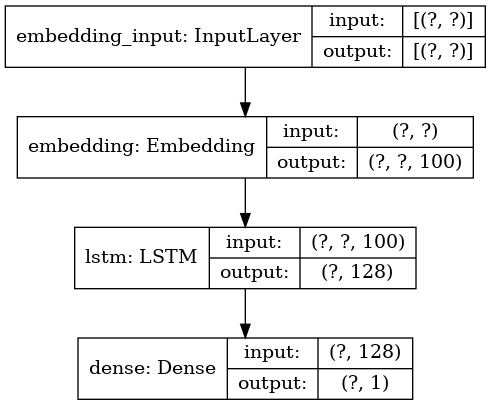

In [16]:
MODEL_SUMMARY_FILE = "movie_review_model.png"
MODEL_SUMMARY_PATH = os.path.join(MODEL_DIR, MODEL_SUMMARY_FILE)

from tensorflow.keras.utils import plot_model
# tf.keras.utils.plot_model(model, to_file = model_dir + 'cifar10_cnn_model.png', show_shapes=True)
plot_model(model, to_file = MODEL_SUMMARY_PATH, show_shapes=True)

In [17]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

MODEL_FILE = "best_model.h5"
MODEL_PATH = os.path.join(MODEL_DIR, MODEL_FILE)

mc = ModelCheckpoint(MODEL_PATH, monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [19]:
history = model.fit(train_X, train_y, epochs=15, callbacks=[es, mc], batch_size=300, validation_split=0.2)

Train on 114768 samples, validate on 28692 samples
Epoch 1/15
114600/114768 [============================>.] - ETA: 0s - loss: 0.4388 - acc: 0.7943
Epoch 00001: val_acc improved from -inf to 0.83034, saving model to model/best_model.h5
114768/114768 [==============================] - 50s 433us/sample - loss: 0.4387 - acc: 0.7944 - val_loss: 0.3911 - val_acc: 0.8303
Epoch 2/15
114600/114768 [============================>.] - ETA: 0s - loss: 0.3613 - acc: 0.8429
Epoch 00002: val_acc improved from 0.83034 to 0.83734, saving model to model/best_model.h5
114768/114768 [==============================] - 51s 444us/sample - loss: 0.3613 - acc: 0.8429 - val_loss: 0.3649 - val_acc: 0.8373
Epoch 3/15
114600/114768 [============================>.] - ETA: 0s - loss: 0.3331 - acc: 0.8568
Epoch 00003: val_acc improved from 0.83734 to 0.84330, saving model to model/best_model.h5
114768/114768 [==============================] - 50s 439us/sample - loss: 0.3330 - acc: 0.8568 - val_loss: 0.3578 - val_acc:

In [20]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [21]:
import matplotlib.pyplot as plt

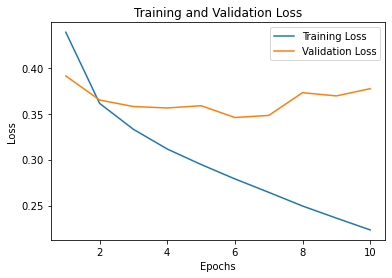

In [22]:
# loss 측정값의 시각화 입니다.  

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

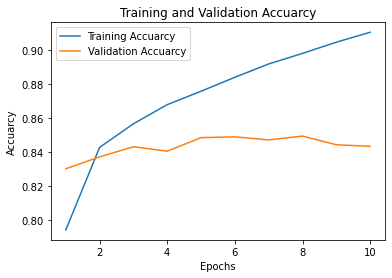

In [23]:
# accuracy 측정값의 시각화 입니다.  

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss)+1)
plt.plot(epochs,acc,label='Training Accuarcy')
plt.plot(epochs,val_acc,label='Validation Accuarcy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

---
### 10) 테스트 ; 추론(Inference)

#### (가) 데스트 데이터로 평가

In [24]:
PROCESSED_TEST_DATA_FILE = "test_padded.p"
PROCESSED_TEST_LABEL_FILE = "test_label.p"

PROCESSED_TEST_DATA_PATH = os.path.join(PROCESSED_DATA_DIR, PROCESSED_TEST_DATA_FILE)
PROCESSED_TEST_LABEL_PATH = os.path.join(PROCESSED_DATA_DIR, PROCESSED_TEST_LABEL_FILE)

In [25]:
with open(PROCESSED_TEST_DATA_PATH, "rb" ) as file:
    test_padded = pickle.load(file)
with open(PROCESSED_TEST_LABEL_PATH, "rb" ) as file:
    test_y = pickle.load(file)    

In [26]:
test_X = test_padded
test_Y = test_y
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_X, test_Y, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
48342/48342 [==============================] - 7s 154us/sample - loss: 0.3968 - acc: 0.8239
test loss, test acc: [0.39679258310436283, 0.82385916]


In [27]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(test_X[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 1)


In [28]:
predictions

array([[0.97842157],
       [0.03306741],
       [0.00683609]], dtype=float32)

#### (나) 문장을 입력하여 추론하는 프로그램
  1. 형태소 분석
  2. 시퀀스 만들기
  3. 패딩
  4. 추론 : model.predict()

In [29]:
def get_morphed_word(wiki_result):
    # print('wiki_result : ', wiki_result[0][0])
    txt = []
    for i in wiki_result[0][0]:
        txt.append(i[0])
    # print('wiki_result, txt : ', txt)
    
    return txt

In [30]:
from kiwipiepy import Kiwi
# 형태소 분석 함수
def get_morph(input_text):
    # print('get_morph : ', input_text)
    kiwi = Kiwi()
    kiwi.prepare()
    morphed = get_morphed_word(kiwi.analyze(input_text))
    # print('morphed : ', morphed)
    
    return morphed

In [32]:
# max_len = 30 # 시퀀스의 길이를 30으로 고정
trunc_type = "post" # 길이가 30 보다 길 때 뒷 부분을 버린다. 
padding_type = "post" # 길이가 30 보다 짧을 대 뒷 부분을 0으로 채운다.

# padding : 뒤를 0으로 채운다.
from tensorflow.keras.preprocessing.sequence import pad_sequences

def sentiment_predict(sentence):
    morphed = get_morph(sentence)
    # print(morphed)
    encoded = tokenizer.texts_to_sequences([morphed]) # 정수 인코딩
    # print('encoded : ', encoded)
    padded = pad_sequences(encoded, maxlen = max_len, padding=padding_type, truncating=trunc_type) # 패딩
    # print(padded)
    score = float(model.predict(padded)) # 예측
    
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [33]:
input_txt = '이 영화 정말 재밌네!'

In [34]:
sentiment_predict(input_txt)

89.45% 확률로 긍정 리뷰입니다.



In [35]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

96.03% 확률로 긍정 리뷰입니다.



In [36]:
sentiment_predict('이 영화 핵노잼')

99.22% 확률로 부정 리뷰입니다.



In [37]:
sentiment_predict('뭐 이런 영화가 다있어?')

59.81% 확률로 부정 리뷰입니다.



In [38]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

98.47% 확률로 부정 리뷰입니다.



In [39]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

98.49% 확률로 부정 리뷰입니다.



In [40]:
sentiment_predict('감독 뭐하는 놈이냐?')

94.34% 확률로 부정 리뷰입니다.



In [41]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

82.37% 확률로 긍정 리뷰입니다.



In [42]:
sentiment_predict('재미있네요.')

94.21% 확률로 긍정 리뷰입니다.

